In [23]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import cm
import matplotlib.cbook as cbook
import matplotlib.colors as colors

import pandas as pd
import xarray as xr
from netCDF4 import Dataset, num2date, date2num
from datetime import datetime, timedelta
import os

%matplotlib inline

In [24]:
lat = 0
lon = -140

In [52]:
def compareFig(lat, lon):
    LAT = lat
    LON = lon
    
    if lat < 0:
        latUnits = 'S'
    else:
        latUnits = 'N'
    
    if lon < 0:
        lonUnits = 'W'
        LON += 360
    else:
        lonUnits = 'E'
    
    lat=abs(lat)
    lon=abs(lon)
    
    larrID = f'{lat}{latUnits.lower()}{lon}{lonUnits.lower()}'
    
    myFileName = f'../../../downloads/Buoy/extractedGZ2/WINDS/T_{lat:02d}{latUnits}_{lon:03d}{lonUnits}_matchupNearestFour_2007.nc'
    larryFileName = f'../../../downloads/larryNielData/larry2020/EXP3/fromLarry_{larrID}_ASCATdata.nc'

    if not os.path.isfile(myFileName) or not os.path.isfile(larryFileName):
        print(myFileName)
        print(larryFileName)
        return
    
    mdf = xr.open_dataset(myFileName)
    ldf = xr.open_dataset(larryFileName)
    
    mWspd = mdf['U10N_AS'][0]
    lWspd = ldf['sat_wspd10n']
    mtime = mdf['time']
    ltime = ldf['time']
    
    plt.figure(figsize=(20,4))
    plt.plot(mtime, mWspd, label ='my')
    plt.plot(ltime, lWspd, label = 'larry')
    plt.legend()
    
    plt.savefig(f'comparison/T_{lat:02d}{latUnits}_{lon:03d}{lonUnits}_ASCATCompare.png', dpi=100)
    plt.close()

In [53]:
latList = [-9, -8, -5, -2, 0, 2, 5, 8, 9]
lonList = [-95, -110, -125, -140, -155, -170, -180, 165]

ylen = len(latList)
xlen = len(lonList)

taskList = []

for latId  in range(ylen):
    for lonId in range(xlen):
        taskList.append([latList[latId], lonList[lonId]])

for task in taskList:
    lat = task[0]
    lon = task[1]
    compareFig(lat, lon)

../../../downloads/Buoy/extractedGZ2/WINDS/T_09S_095W_matchupNearestFour_2007.nc
../../../downloads/larryNielData/larry2020/EXP3/fromLarry_9s95w_ASCATdata.nc
../../../downloads/Buoy/extractedGZ2/WINDS/T_09S_110W_matchupNearestFour_2007.nc
../../../downloads/larryNielData/larry2020/EXP3/fromLarry_9s110w_ASCATdata.nc
../../../downloads/Buoy/extractedGZ2/WINDS/T_09S_125W_matchupNearestFour_2007.nc
../../../downloads/larryNielData/larry2020/EXP3/fromLarry_9s125w_ASCATdata.nc
../../../downloads/Buoy/extractedGZ2/WINDS/T_09S_140W_matchupNearestFour_2007.nc
../../../downloads/larryNielData/larry2020/EXP3/fromLarry_9s140w_ASCATdata.nc
../../../downloads/Buoy/extractedGZ2/WINDS/T_09S_155W_matchupNearestFour_2007.nc
../../../downloads/larryNielData/larry2020/EXP3/fromLarry_9s155w_ASCATdata.nc
../../../downloads/Buoy/extractedGZ2/WINDS/T_09S_170W_matchupNearestFour_2007.nc
../../../downloads/larryNielData/larry2020/EXP3/fromLarry_9s170w_ASCATdata.nc
../../../downloads/Buoy/extractedGZ2/WINDS/T_09

In [43]:
mdf

<xarray.Dataset>
Dimensions:         (time: 1800, N: 4)
Coordinates:
  * time            (time) datetime64[ns] 2007-01-01T07:20:00 ... 2011-08-30T...
Dimensions without coordinates: N
Data variables: (12/17)
    U10N_AS         (N, time) float64 7.82 7.82 9.18 9.18 ... nan nan nan nan
    U10N_dir_AS     (N, time) float64 ...
    satTimeDiff     (N, time) timedelta64[ns] ...
    dist            (N, time) float64 ...
    satLon          (N, time) float64 ...
    satLat          (N, time) float64 ...
    ...              ...
    U10N_y_TAO2     (time) float64 ...
    SST_TAO         (time) float64 ...
    RH_TAO          (time) float64 ...
    AIRT_TAO        (time) float64 ...
    wspdVar2hr_TAO  (time) float64 ...
    wdirVar2hr_TAO  (time) float64 ...

In [28]:
ldf

<xarray.Dataset>
Dimensions:       (time: 906)
Coordinates:
  * time          (time) datetime64[ns] 2008-05-10T19:12:00 ... 2011-08-30T07...
Data variables:
    sat_wspd10n   (time) float64 ...
    buoy_wspd10n  (time) float64 ...
    sat_u10n      (time) float64 ...
    buoy_u10n     (time) float64 ...
    sat_v10n      (time) float64 ...
    buoy_v10n     (time) float64 ...
Attributes:
    Description:  Netcdf file created from Larry's matchup

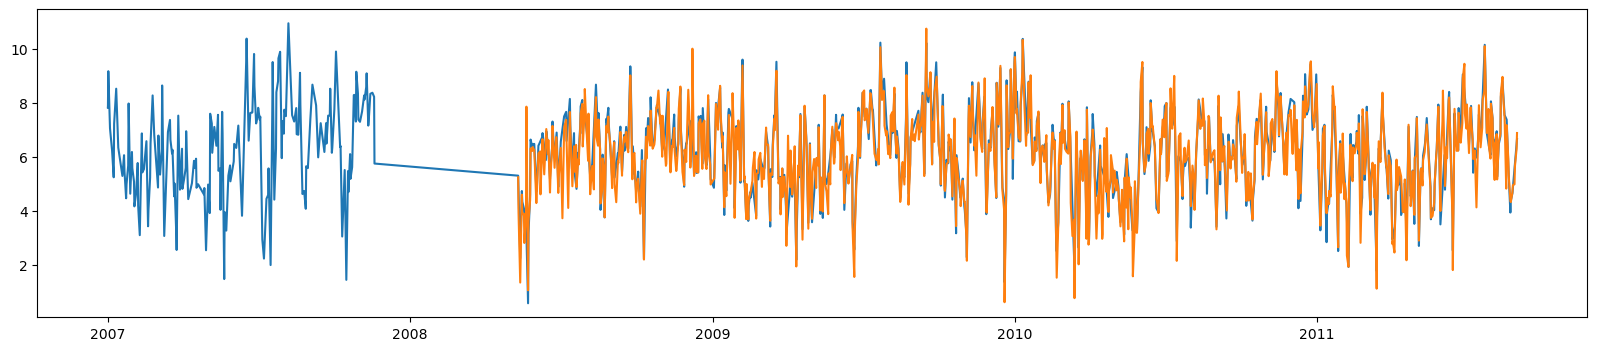

In [54]:
def compareBuoyFig(lat, lon):
    LAT = lat
    LON = lon
    
    if lat < 0:
        latUnits = 'S'
    else:
        latUnits = 'N'
    
    if lon < 0:
        lonUnits = 'W'
        LON += 360
    else:
        lonUnits = 'E'
    
    lat=abs(lat)
    lon=abs(lon)
    
    larrID = f'{lat}{latUnits.lower()}{lon}{lonUnits.lower()}'
    
    myFileName = f'../../../downloads/Buoy/extractedGZ2/WINDS/T_{lat:02d}{latUnits}_{lon:03d}{lonUnits}_matchupNearestFour_2007.nc'
    larryFileName = f'../../../downloads/larryNielData/larry2020/EXP3/fromLarry_{larrID}_ASCATdata.nc'

    if not os.path.isfile(myFileName) or not os.path.isfile(larryFileName):
        print(myFileName)
        print(larryFileName)
        return
    
    mdf = xr.open_dataset(myFileName)
    ldf = xr.open_dataset(larryFileName)
    
    mWspd = mdf['U10N_TAO']
    lWspd = ldf['buoy_wspd10n']
    mtime = mdf['time']
    ltime = ldf['time']
    
    plt.figure(figsize=(20,4))
    plt.plot(mtime, mWspd, label ='my Buoy')
    plt.plot(ltime, lWspd, label = 'larry Buoy')
    plt.legend()
    
    plt.savefig(f'comparison/T_{lat:02d}{latUnits}_{lon:03d}{lonUnits}_BuoyCompare.png', dpi=100)
    plt.close()

In [55]:
latList = [-9, -8, -5, -2, 0, 2, 5, 8, 9]
lonList = [-95, -110, -125, -140, -155, -170, -180, 165]

ylen = len(latList)
xlen = len(lonList)

taskList = []

for latId  in range(ylen):
    for lonId in range(xlen):
        taskList.append([latList[latId], lonList[lonId]])

for task in taskList:
    lat = task[0]
    lon = task[1]
    compareBuoyFig(lat, lon)

../../../downloads/Buoy/extractedGZ2/WINDS/T_09S_095W_matchupNearestFour_2007.nc
../../../downloads/larryNielData/larry2020/EXP3/fromLarry_9s95w_ASCATdata.nc
../../../downloads/Buoy/extractedGZ2/WINDS/T_09S_110W_matchupNearestFour_2007.nc
../../../downloads/larryNielData/larry2020/EXP3/fromLarry_9s110w_ASCATdata.nc
../../../downloads/Buoy/extractedGZ2/WINDS/T_09S_125W_matchupNearestFour_2007.nc
../../../downloads/larryNielData/larry2020/EXP3/fromLarry_9s125w_ASCATdata.nc
../../../downloads/Buoy/extractedGZ2/WINDS/T_09S_140W_matchupNearestFour_2007.nc
../../../downloads/larryNielData/larry2020/EXP3/fromLarry_9s140w_ASCATdata.nc
../../../downloads/Buoy/extractedGZ2/WINDS/T_09S_155W_matchupNearestFour_2007.nc
../../../downloads/larryNielData/larry2020/EXP3/fromLarry_9s155w_ASCATdata.nc
../../../downloads/Buoy/extractedGZ2/WINDS/T_09S_170W_matchupNearestFour_2007.nc
../../../downloads/larryNielData/larry2020/EXP3/fromLarry_9s170w_ASCATdata.nc
../../../downloads/Buoy/extractedGZ2/WINDS/T_09